请先前往oanda官网注册账号获取token和ID。由于计算复杂度，目前只支持美元货币对。

[参照此链接，新建并将oandakey.py文件添加到pythono搜索目录](https://python3-cookbook.readthedocs.io/zh_CN/latest/c10/p09_add_directories_to_sys_path.html)

In [3]:
# oandakey.py  
access_token = ''
accountID = ''

先要安装oanda api

`pip install oandapyV20`

In [1]:
# 多线程保存数据
from oandakey import access_token, accountID
from OnePy.builtin_module.mongodb_saver import oanda_saver
from OnePy.builtin_module.mongodb_saver.utils import MongoDBFunc
from OnePy.utils.awesome_func import run_multiprocessing, run_multithreading

# 多个
ticker_list = ['EUR_USD', 'AUD_USD', 'GBP_USD', 'USD_CAD', 'USD_JPY']
ticker_list = ['EUR_USD']

# period_list = ['M5',  'M30', 'H1', 'H2', 'H3', 'H4', 'H6', 'H12', 'D', 'W']
period_list = ['M30']


oanda_saver.multi_oanda_candles_to_mongodb(accountID, access_token,
                                           ticker_list,
                                           period_list,
                                           fromdate='2015-01-01')

MongoDBFunc().drop_duplicates(ticker_list, period_list, 'oanda')

Start!
['EUR_USD'],M30 all set!!!!!
<<EUR_USD, M30>> has been drop 76961 duplicates!


In [2]:
import OnePy as op
from OnePy.custom_module.cleaner_sma import SMA


class SmaStrategy(op.StrategyBase):

    def __init__(self):

        super().__init__()
        self.sma1 = SMA(3, 40).calculate
        self.sma2 = SMA(5, 40).calculate

    def handle_bar(self):
        for ticker in self.env.tickers:

            if self.sma1(ticker) > self.sma2(ticker):

                self.buy(100, ticker, takeprofit=15,
                         stoploss=100)
            else:
                self.sell(100, ticker)

                

START, END = "2016-01-05", "2016-02-05"
FREQUENCY = "M30"
TICKER_LIST = ["EUR_USD"]
INITIAL_CASH = 20000

SmaStrategy()

go = op.backtest.forex(TICKER_LIST, FREQUENCY, INITIAL_CASH, START, END, "oanda")

In [3]:
go.sunny(show_process=True)

正在初始化OnePy
=============== OnePy初始化成功！ ===============
开始寻找OnePiece之旅~~~


>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> [97%]

+--------------------------------+
|Fromdate           |  2016-01-05|
|Todate             |  2016-02-05|
|Initial_Value      |   $20000.00|
|Final_Value        |   $21973.31|
|Total_Return       |      9.867%|
|Max_Drawdown       |      4.143%|
|Max_Duration       |     22 days|
|Max_Drawdown_Date  |  2016-01-31|
|Sharpe_Ratio       |        3.79|
+--------------------------------+


/Users/chandler/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:2362: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



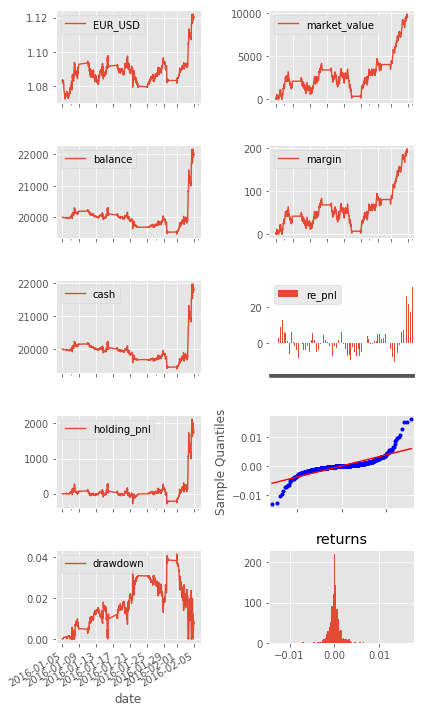

In [4]:
go.output.plot('EUR_USD')

In [5]:
go.output.trade_log()

,ticker,entry_date,entry_price,entry_type,size,exit_date,exit_price,exit_type,pl_points,re_pnl,comm,holding_period,drawdown,run_up,returns_diff
0,EUR_USD,2016-01-05 01:00:00,1.08348,Market Buy,100,2016-01-05 02:30:00,1.08240,Market Sell,-0.00108,-1.08,0.015,1:30:00,0.001791,0.000378,-0.000997
1,EUR_USD,2016-01-05 01:30:00,1.08248,Market Buy,100,2016-01-05 03:00:00,1.08170,Market Sell,-0.00078,-0.78,0.015,1:30:00,0.000887,0.000924,-0.000721
2,EUR_USD,2016-01-05 04:30:00,1.08226,Market Buy,100,2016-01-05 07:30:00,1.08064,Market Sell,-0.00162,-1.62,0.015,3:00:00,0.001709,0.001294,-0.001497
3,EUR_USD,2016-01-05 05:00:00,1.08296,Market Buy,100,2016-01-05 08:00:00,1.08088,Market Sell,-0.00208,-2.08,0.015,3:00:00,0.002355,0.000646,-0.001921
4,EUR_USD,2016-01-05 05:30:00,1.08312,Market Buy,100,2016-01-05 08:30:00,1.08060,Market Sell,-0.00252,-2.52,0.015,3:00:00,0.004210,0.000499,-0.002327
5,EUR_USD,2016-01-05 06:00:00,1.08301,Market Buy,100,2016-01-05 09:00:00,1.07898,Market Sell,-0.00403,-4.03,0.015,3:00:00,0.004377,0.000600,-0.003721
6,EUR_USD,2016-01-05 06:30:00,1.08272,Market Buy,100,2016-01-05 09:30:00,1.07898,Market Sell,-0.00374,-3.74,0.015,3:00:00,0.005034,0.000351,-0.003454
7,EUR_USD,2016-01-05 17:00:00,1.07355,Market Buy,100,2016-01-05 19:30:00,1.07369,Market Sell,0.00014,0.14,0.015,2:30:00,0.000214,0.001220,0.000130
8,EUR_USD,2016-01-05 17:30:00,1.07459,Market Buy,100,2016-01-05 20:00:00,1.07438,Market Sell,-0.00021,-0.21,0.015,2:30:00,0.001182,0.000251,-0.000195
9,EUR_USD,2016-01-05 18:00:00,1.07439,Market Buy,100,2016-01-06 00:30:00,1.07446,Market Sell,0.00007,0.07,0.015,6:30:00,0.000996,0.001359,0.000065
